<a href="https://colab.research.google.com/github/Gabrielasants7/Portfolio-Ciencia-de-Dados/blob/main/EDA_VINHOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANÁLISE EXPLORATÓRIA DE DADOS ( VINHOS)
OBS: Para uma melhor visualização abrir pelo Colab (A maioria dos gráficos são interativos )
# **Escopo do Projeto**


# 1. ONDE ENCONTRAR ESSE CONJUNTO DE DADOS?

 https://archive.ics.uci.edu/ml/datasets/wine+quality

# 2.   SOBRE

O conjunto de dados , contém informações sobre várias propriedades dos vinhos. Cada vinho tem um rótulo de qualidade associado a ele, O rótulo está no intervalo de 0 a 10.



# 3.  OBJETIVO

Embarquei nesta análise inspirada pela minha paixão pela enologia. Sendo uma entusiasta do mundo dos vinhos, desejei desvendar os segredos por trás das garrafas e compreender o que verdadeiramente contribui para a qualidade de um vinho. Este conjunto de dados é a minha bússola nessa jornada.

A essência dessa exploração é desvendar as nuances que transformam um vinho de simplesmente bom para excepcional. O que está por trás de uma classificação elevada de qualidade? Estou comprometida em responder a essa pergunta, etapa por etapa, sem perder nenhum detalhe. Minha esperança é que, ao final desta análise, possamos desvendar juntos os mistérios que elevam um vinho à excelência.

Conto com a sua companhia nesta aventura pela análise exploratória desses dados vinícolas. Vamos degustar cada gráfico, cada correlação, e juntos revelaremos o que torna um vinho não apenas bom, mas excepcional. Estou ansiosa para compartilhar esta jornada enológica e descobrir, lado a lado, os segredos por trás da qualidade dos vinhos. Afinal, cada gole conta uma história, e queremos entender cada capítulo desse enigma vinífero.

# 4. PÚBLICO

Entusiastas de vinhos

Produtores de vinhos

Consumidores de vinhos

Curiosos

Pesquisadores

Restaurateurs e Sommeliers










# CARREGANDO AS BIBLIOTECAS

In [70]:
#Carregando as bibliotecas
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

#Modelagem

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

# INICIANDO


In [71]:
#Carregando o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
vinhos  = pd.read_csv(url, sep=";")
vinhos.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [72]:
#CHECANDO AS COLUNAS
vinhos.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# DICIONÁRIO DAS VARIÁVEIS








| Característica            | Descrição                                                                                       | Unidade   |
|---------------------------|-------------------------------------------------------------------------------------------------|-----------|
| Fixed acidity             | Indica a quantidade de ácido tartárico no vinho e é medida em g/dm³.                           | g/dm³     |
| Volatile acidity          | Indica a quantidade de ácido acético no vinho, é medido em g/dm³.                               | g/dm³     |
| Citric acid               | Indica a quantidade de ácido cítrico no vinho, também é medido em g/dm³.                         | g/dm³     |
| Residual sugar            | Indica a quantidade de açúcar que resta no vinho após o processo de fermentação, medido em g/dm³.| g/dm³     |
| Chlorides                 | -                                                                                               | -         |
| Free sulfur dioxide       | Mede a quantidade de dióxido de enxofre (SO₂) na forma livre, também é medido em g/dm³.         | g/dm³     |
| Total sulfur dioxide      | Mede a quantidade total de SO₂ no vinho. Este produto químico funciona como antioxidante e antimicrobiano.| - |
| Density                   | Indica a densidade do vinho e é medida em g/dm³.                                               | g/dm³     |
| pH                        | Indica o valor do pH do vinho, a faixa está entre 0 e 14, onde 0 é muito ácido e 14 é muito básico.| -       |
| Sulphates                 | Indica a quantidade de sulfato de potássio no vinho, medido em g/dm³.                           | g/dm³     |
| Alcohol                   | Indica o teor alcoólico do vinho.                                                               | -         |
| Quality                   | Indica a qualidade do vinho, varia de 1 a 10, onde valores mais altos indicam melhor qualidade. | -         |



#EDA

In [73]:
# tipos dos dados
vinhos.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [74]:
duplicatas = vinhos[vinhos.duplicated(keep=False)]

# Exibindo as linhas duplicadas
print("Linhas duplicadas:")
print(duplicatas)

# Calculando a porcentagem de dados duplicados
porcentagem_duplicados = vinhos.duplicated().mean() * 100
print(f'\nA porcentagem de dados duplicados no conjunto de dados é: {porcentagem_duplicados:.2f}%')

Linhas duplicadas:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4851            6.4              0.33         0.44             8.9      0.055   
4855            7.1              0.23         0.39            13.7      0.058   
4856            7.1              0.23         0.39            13.7      0.058   
4879            6.6              0.34         0.40             8.1      0.046   
4880            6.6              0.34         0.40             8.1      0.046   

      fr

In [75]:
# Identificando duplicatas com base em colunas relevantes
duplicatas_especificas = vinhos[vinhos.duplicated(subset=['fixed acidity', 'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides', 'total sulfur dioxide' ,'density' ,'pH', 'sulphates'], keep=False)]

# Exibindo duplicatas específicas
print("Duplicatas específicas:")
print(duplicatas_especificas)

# Analisando os  padrões nas colunas relevantes
analise_colunas_relevantes = vinhos.groupby(['fixed acidity', 'volatile acidity' , 'citric acid' , 'residual sugar' , 'chlorides']).size().reset_index(name='contagem')
print("\nAnálise de padrões nas colunas relevantes:")
print(analise_colunas_relevantes)

Duplicatas específicas:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4855            7.1              0.23         0.39            13.7      0.058   
4856            7.1              0.23         0.39            13.7      0.058   
4879            6.6              0.34         0.40             8.1      0.046   
4880            6.6              0.34         0.40             8.1      0.046   
4885            6.6              0.34         0.40             8.1      0.046   

   

In [76]:
#REMOVENDO ÁS DUPLICADAS
vinhos = vinhos.drop_duplicates()


In [77]:
#porcetagem de valores nulos de acordo com a coluna

vinhos.isna().sum()/vinhos.shape[0]

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [78]:
#Estatística descritiva
vinhos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000




  Acidez fixa: A acidez fixa média é de 6,84. A acidez fixa é importante para a qualidade do vinho, pois contribui para o seu sabor azedinho.

Acidez volátil: A acidez volátil média é de 0,28. A acidez volátil é menos importante para a qualidade do vinho, mas níveis elevados podem fazer com que o vinho tenha um sabor azedinho ou até mesmo aquele sabor de  vinagre.

Ácido cítrico: A concentração média de ácido cítrico é de 0,33. O ácido cítrico contribui para o sabor azedinho do vinho.

Açúcar residual: A concentração média de açúcar residual é de 5,91. O açúcar residual pode contribuir para o sabor doce do vinho.

Cloretos: A concentração média de cloretos é de 0,046. Os cloretos podem afetar o sabor do vinho.

Dióxido de enxofre livre: A concentração média de dióxido de enxofre livre é de 34,89. O dióxido de enxofre livre é um conservante que é adicionado ao vinho para protegê-lo da oxidação.

Dióxido de enxofre total: A concentração média de dióxido de enxofre total é de 137,20. O dióxido de enxofre total é a soma do dióxido de enxofre livre e do dióxido de enxofre ligado.

Densidade: A densidade média é de 0,994. A densidade do vinho pode ser afetada pelo teor alcoólico e outros fatores.

pH: O pH médio é de 3,19. O pH do vinho pode afetar o seu sabor e estabilidade.

Sulfatos: A concentração média de sulfatos é de 0,49. Os sulfatos podem afetar o sabor do vinho.

Álcool: A concentração média de álcool é de 10,59. O teor alcoólico do vinho pode afetar o seu sabor e sensação na boca.

Qualidade: A qualidade média do vinho é de 6,0. A qualidade do vinho é avaliada por especialistas.





In [79]:
# variância do conjunto de dados usando a função var()
variância=vinhos.var()
print(variância)

fixed acidity              0.751446
volatile acidity           0.010699
citric acid                0.014993
residual sugar            23.635605
chlorides                  0.000534
free sulfur dioxide      296.184809
total sulfur dioxide    1860.116268
density                    0.000008
pH                         0.022966
sulphates                  0.012887
alcohol                    1.481275
quality                    0.793316
dtype: float64


 A variância para acidez fixa, açúcar residual, dióxido de enxofre livre, dióxido de enxofre total e álcool é relativamente alta, indicando que essas propriedades variam amplamente entre diferentes amostras de vinho.Sob outra perspectiva , a variância para acidez volátil, ácido cítrico, cloretos, densidade, pH e sulfatos é relativamente baixa, indicando que essas propriedades tendem a ser mais espessos entre diferentes amostras de vinho.

A variância dessas propriedades químicas pode ser influenciada por vários fatores, incluindo ; variedade de uva, clima, condições do solo e práticas de vinificação. Por exemplo, a acidez fixa é influenciada principalmente pela variedade de uva e clima, enquanto o açúcar residual é afetado pela quantidade de açúcar que não é fermentado durante o processo de vinificação.

In [80]:
# variância da coluna específica
var_quality=vinhos.loc[:,"quality"].var()
print(var_quality)

0.7933156355271982


In [81]:
#vamos obter a assimetria
vinhos.skew()

fixed acidity           0.696100
volatile acidity        1.641081
citric acid             1.310601
residual sugar          1.333639
chlorides               4.969076
free sulfur dioxide     1.566680
total sulfur dioxide    0.456800
density                 1.273318
pH                      0.455457
sulphates               0.937853
alcohol                 0.450697
quality                 0.112004
dtype: float64

In [82]:
# kurtose da coluna específica
sk_quality=vinhos.loc[:,"quality"].kurt()
print(sk_quality)

0.29934517032201935


Baseado na análise a cima está indicando que a distribuição é ligeiramente mais pontiaguda do que a distribuição normal. Ou seja  que a maioria dos vinhos tem uma qualidade média, entretanto há alguns vinhos de alta qualidade e alguns vinhos de baixa qualidade.

# Visualização
  
  Primeiramente, começarei explorando as colunas mais correlacionadas . Segundamente, irei comparar duas colunas diferentes e observar .

  Começarei com a **quality** .

In [83]:
fig = px.histogram(vinhos, x='quality', title='Distribuição da Qualidade do Vinho', labels={'quality': 'Qualidade'})
fig.update_layout(xaxis=dict(tickvals=list(range(1, 11)), ticktext=list(range(1, 11))))
fig.show()

A saída indica que a maioria dos vinhos é de qualidade média, a maioria dos vinhos tintos pertence ao grupo com rótulos de qualidade  5 e 6 .

#  ENCONTRANDO COLUNAS CORRELACIONADAS

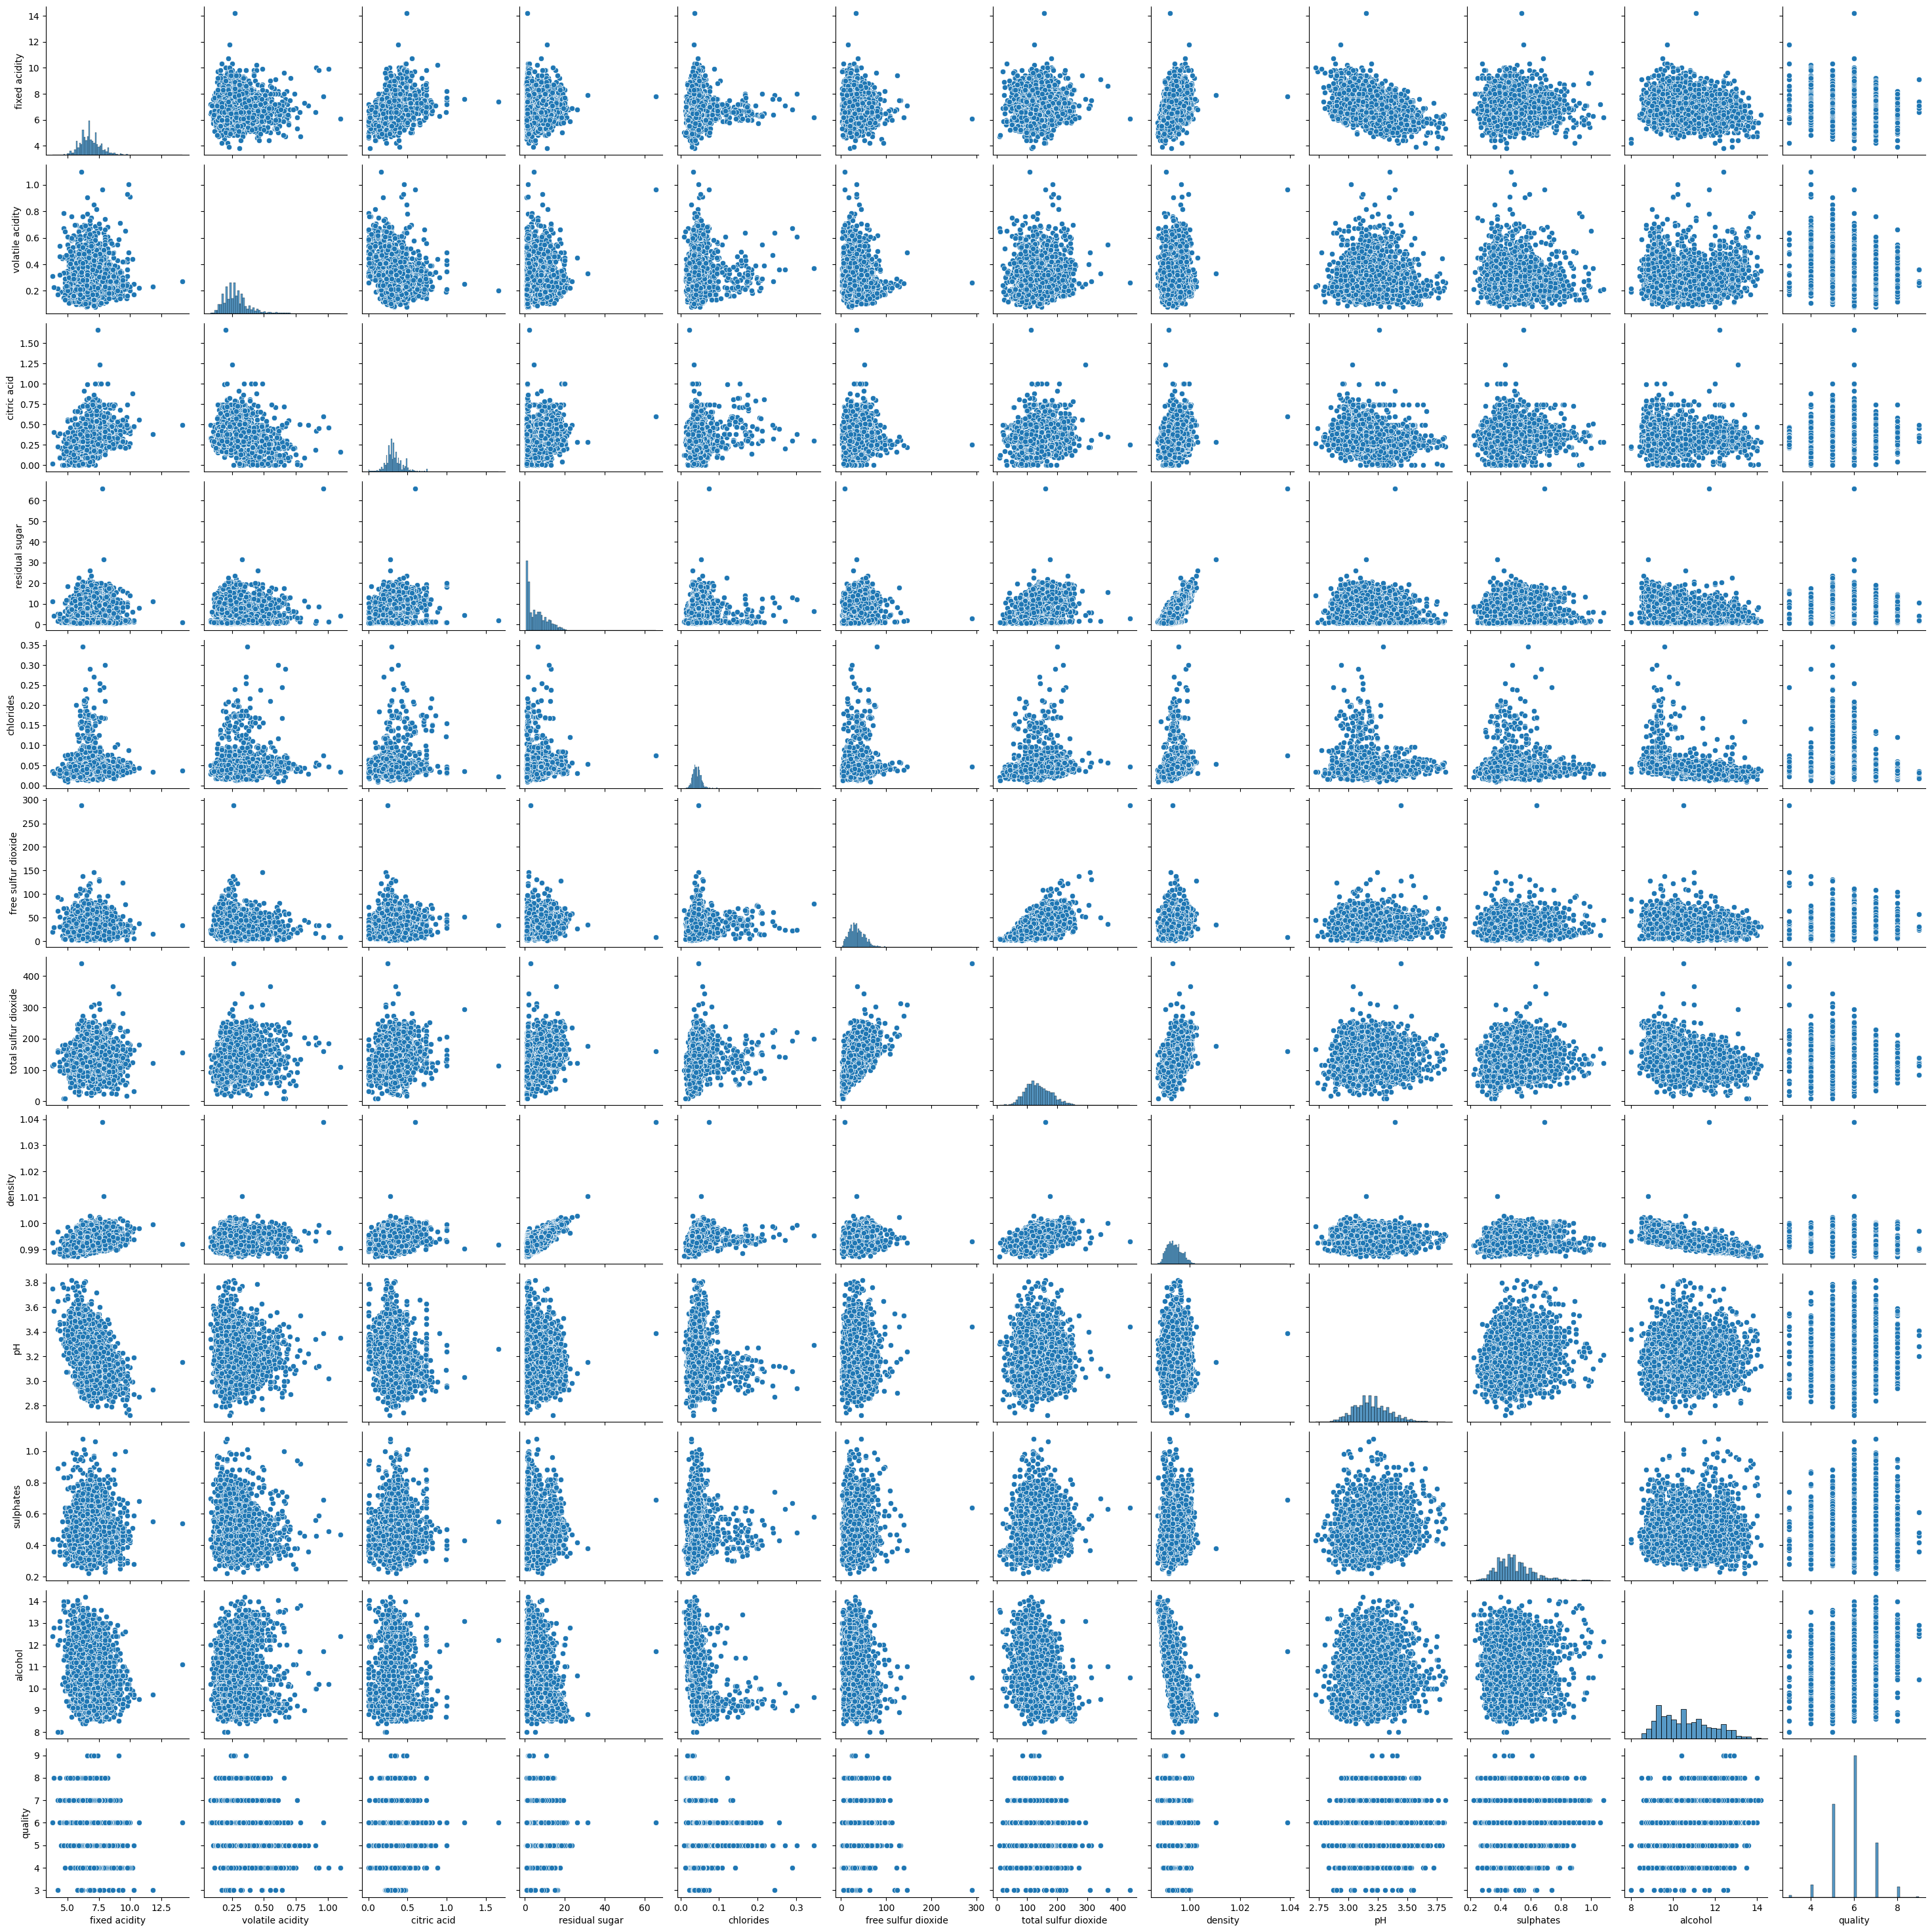

In [84]:
sns.pairplot(vinhos)

 Existe uma correlação negativa da acidez com o pH. Da mesma forma, existe uma correlação negativa entre a porcentagem de álcool e a densidade. Além disso, você pode ver exatamente quais colunas têm uma correlação positiva ou negativa com outras colunas. No entanto, como não há números , pode ser um pouco tendencioso interpretar os resultados. Por exemplo, examine a correlação entre as colunas para a acidez fixa e a acidez volátil. O gráfico pode ser de alguma forma simétrico. No entanto, você pode argumentar que há alguns pontos esparsos no lado direito do gráfico, portanto, há uma correlação levemente negativa. Aqui, meu ponto é, sem qualquer número quantificável específico, é difícil dizer. Esta é a razão pela qual podemos usar o Mapa de calor .

#  MAPA DE CALOR

In [85]:
correlation_matrix = vinhos.corr()

fig = px.imshow(
    correlation_matrix,
    labels=dict(color="Correlation"),
    x=correlation_matrix.index,
    y=correlation_matrix.columns,
    color_continuous_scale="Reds",
)

fig.update_layout(
    title='Matriz de Correlação',
    xaxis=dict(title='Características'),
    yaxis=dict(title='Características'),
    width=800,
    height=800,
)

fig.show()

 Como  o meu destaque é na coluna de qualidade, irei pontuar correlações observadas apartir do mapa de calor .


✔  O álcool está positivamente correlacionado com a qualidade do vinho tinto.

✔  O álcool tem uma correlação positiva fraca com o valor do pH.

✔  O ácido cítrico e a densidade têm uma forte correlação positiva com a acidez fixa.

✔ O pH tem correlação negativa com densidade, acidez fixa, ácido cítrico e sulfatos.


#  Como a concentração de álcool é distribuída em relação à qualidade do vinho ?

In [86]:
fig = px.histogram(vinhos, x='alcohol', title='Distribuição do Teor Alcoólico', nbins=30)

fig.update_layout(
    xaxis=dict(title='Teor Alcoólico'),
    yaxis=dict(title='Contagem'),
)

fig.show()

É possível afirmar que a distribuição do álcool, é positivamente enviesada com a qualidade do vinho tinto.

#  ÁLCOOL X QUALIDADE

Agora irei ver como a qualidade do vinho varia em relação à concentração de álcool, utilizarei o boxplot.

In [87]:
fig = px.box(vinhos, x='quality', y='alcohol', title='Boxplot do Teor Alcoólico por Qualidade')

fig.update_layout(
    xaxis=dict(title='Qualidade'),
    yaxis=dict(title='Teor Alcoólico'),
)

fig.show()

Temos alguns outliers , em torno da  qualidade  do vinho 5 e 6 , irei remover logo abaixo .

<Axes: xlabel='quality', ylabel='alcohol'>

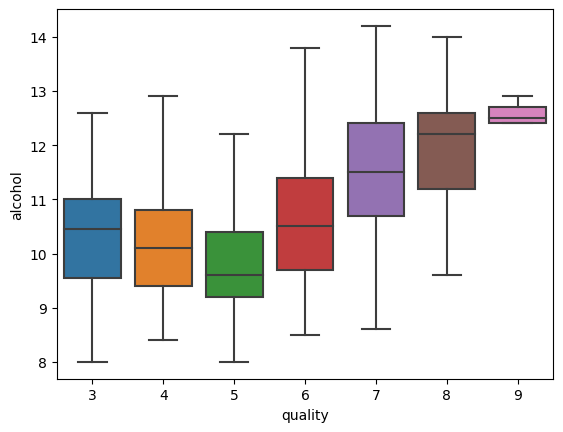

In [88]:
sns.boxplot(x='quality', y='alcohol', data = vinhos, showfliers=False)

Algo interessante a comentar é que vinhos com maior teor alcoólico são melhores avaliados. Vinhos com mais de 13% de teor alcoólico tem por volta de avaliação acima de 7 (boa). Alguns valores mais extremos mostram isso.

# Qualidade x total sulfur dioxide

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

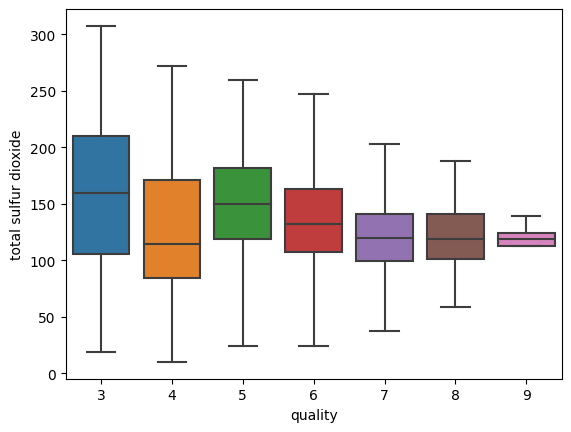

In [89]:
 sns.boxplot(x='quality', y='total sulfur dioxide', data = vinhos, showfliers=False)



O dióxido de enxofre ou SO2 ,  é usado em toda a indústria alimentícia, pois é uma maneira comprovada de proteger itens perecíveis contra oxidação.
Esse aditivo consiste em preservar o frescor do vinho , Vinhos com qualidade entre 5 , 6 , tendem a ter uma concentraçao maior do aditivo .

# Qualidade x Acidez cítrica

<Axes: xlabel='quality', ylabel='citric acid'>

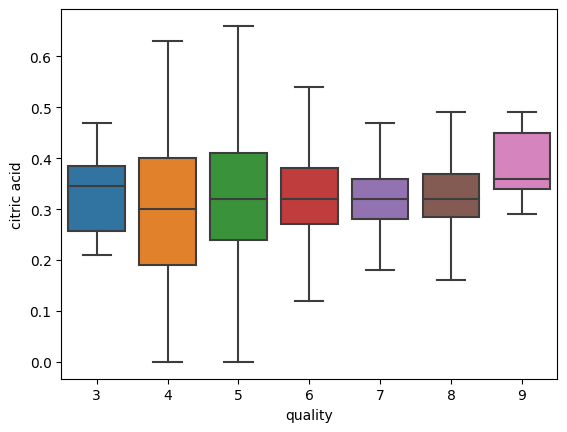

In [90]:
sns.boxplot(x='quality', y='citric acid', data = vinhos, showfliers=False)

Vinhos medianos é de melhores qualidades,  tendem a serem mais cítricos .



# Álcool x Densidade

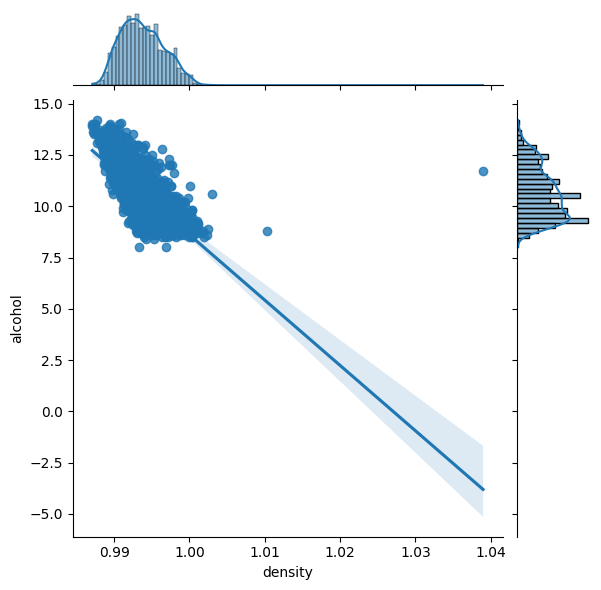

In [91]:
sns.jointplot(x='density',y='alcohol',data=vinhos, kind='reg')


#  ÁLCOOL X PH

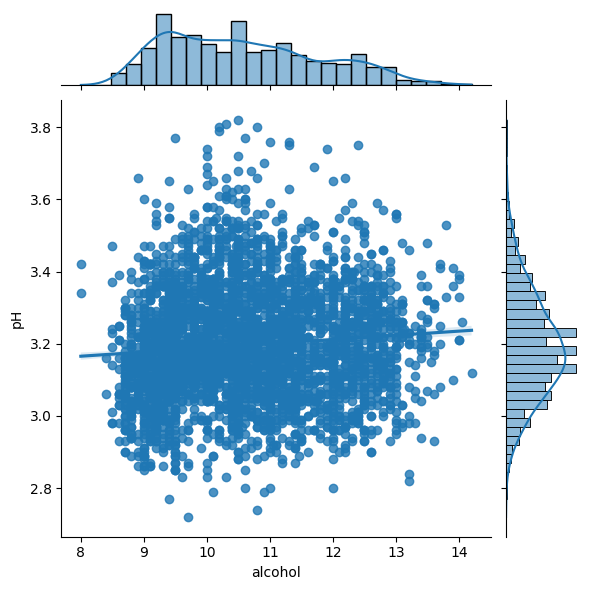

In [92]:
sns.jointplot(x='alcohol',y='pH',data=vinhos, kind='reg')

O álcool tem uma relação fraca , porém é uma relação positiva aos valores de pH. Além disso, a linha de regressão é representada ilustrando a correlação entre elas.

# Correlação de Pearson
O coeficiente de correlação de Pearson , Pode ser usado para resumir a força da relação linear entre duas amostras de dados.

In [93]:
#quantificando a correlação usando Pearson

def get_correlation(column1, column2, df):
  pearson_corr, p_value = pearsonr(df[column1], df[column2])
  print("Correlation between {} and {} is {}".format(column1, column2, pearson_corr))
  print("P-value of this correlation is {}".format(p_value))


In [94]:
get_correlation('alcohol','pH', vinhos)

Correlation between alcohol and pH is 0.09309536999640206
P-value of this correlation is 4.358049687797151e-09


Embora haja uma correlação estatisticamente significativa entre o teor alcoólico e o pH, a força dessa correlação é tão fraca que pode não ter uma relevância prática significativa. No entanto, os resultados estatísticos indicam que essa correlação não ocorreu por acaso.

In [95]:
fig = px.scatter(vinhos, x='alcohol', y='pH', title='Relação entre Álcool e pH',
                 labels={'alcohol': 'Teor Alcoólico', 'pH': 'pH'})

fig.update_layout(
    xaxis=dict(title='Teor Alcoólico'),
    yaxis=dict(title='pH'),
)

fig.show()

# Segmentação

A segmentação irá consistir em dividir  os dados em grupos relevantes (Álcool, pH, Qualidade) posterialmente será  examinada  a correlação dentro de cada segmento. O objetivo é a  revelações de  padrões mais específicos que podem ser mascarados quando todo o conjunto de dados é considerado.

In [96]:
fig = px.scatter(vinhos, x='alcohol', y='pH', color='quality',
                 title='Relação entre Álcool, pH e Qualidade',
                 labels={'alcohol': 'Teor Alcoólico', 'pH': 'pH', 'quality': 'Qualidade'})

fig.update_layout(
    xaxis=dict(title='Teor Alcoólico'),
    yaxis=dict(title='pH'),
)

fig.show()

#  INSIGHTS OBTIDOS ATRAVÉS DA ANÁLISE ACIMA
Vocês lembram do que eu fiquei de responder através dessa análise exploratória ?
Irei refrescar a memória de vocês ...
O que contribui para um vinho de qualidade ?

**Respondendo a pergunta**

Em síntese , Baseado na análise acima é possível afirmar que alguns fatores principais estão relacionadas a qualidade do vinho sendo elas :
alcohol
0.52

volatile acidity
0.40

sulfur dioxide
0.27



Irei comentar um pouco dessas características abaixo .


**O álcool,** É o coração do vinho, Ao mesmo tempo que contribui para a textura e viscosidade do vinho, o álcool também desempenha um papel importante no aroma.  Um vinho doce terá um nível mais alto de açúcar residual, enquanto um vinho seco terá todos os seus açúcares convertidos em álcool durante a fermentação.


Muitas vezes confundido com uma alta concentração de álcool, vinhos de alta acidez são muitas vezes azedos .  É possível afirmar que um vinho de qualidade está interligado a uma acidez volátil , Ou seja quanto maior essa acidez,  maior é a deterioração no sabor. Mas o que é **acidez volátil**  ?

 **A acidez volátil (AV)**, É uma medida dos ácidos voláteis (ou gasosos) do vinho. O ácido volátil primário no vinho é o ácido acético, que também é o ácido primário associado ao cheiro e sabor do vinagre.
 O alto teor de açúcar, por exemplo, pode mascarar os cheiros derivados da acidez volátil, apesar de o AV estar normalmente mais presente em vinhos doces do que em estilos mais secos.



**O sulfur dioxide  (SO2 para abreviar)** , O  Seu destaque deriva de sua capacidade de desempenhar várias funções cruciais, Preserva a frescura e o carácter frutado do vinho graças às propriedades antioxidantes, antimicrobianas e anti-enzimáticas. Não há nenhum outro aditivo disponível para os vinicultores que possa desempenhar sozinho todas essas funções, SO2 é necessário para fazer vinhos de alta qualidade que podem resistir ao teste do tempo .






# Regressão linear

Mean Squared Error: 0.024262550542404372
R-squared: 0.01072663220908232


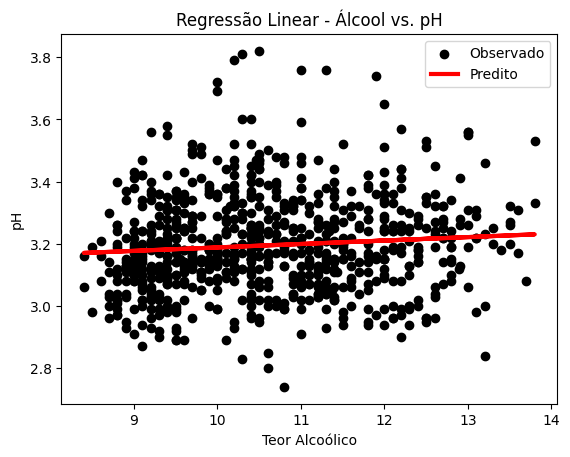

In [97]:
X = vinhos[['alcohol']]
y = vinhos['pH']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotando o modelo
plt.scatter(X_test, y_test, color='black', label='Observado')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Predito')
plt.xlabel('Teor Alcoólico')
plt.ylabel('pH')
plt.title('Regressão Linear - Álcool vs. pH')
plt.legend()
plt.show()

Esses resultados sugerem que o modelo de regressão linear não é muito eficaz para prever o pH com base apenas no teor alcoólico. O R2 baixo indica que o modelo não consegue explicar grande parte da variabilidade observada no pH com base nessa variável independente.

# Regressão linear polynomial

Mean Squared Error: 0.022999255877810577
R-squared: 0.062235799193434915


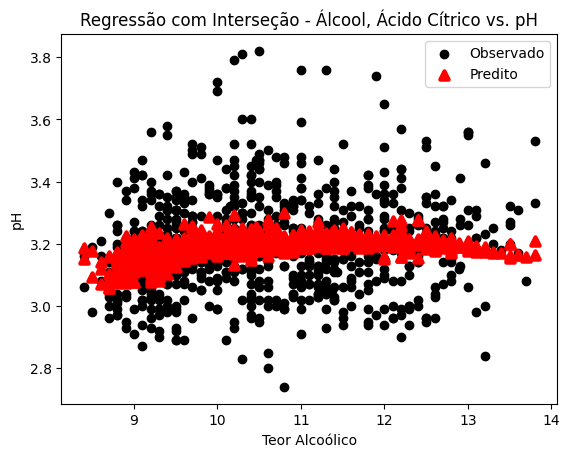

In [98]:
X = vinhos[['alcohol', 'citric acid']]
y = vinhos['pH']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear com termos de interação
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotando o modelo
plt.scatter(X_test['alcohol'], y_test, color='black', label='Observado')
plt.scatter(X_test['alcohol'], y_pred, color='red', linewidth=3, label='Predito', marker='^')
plt.xlabel('Teor Alcoólico')
plt.ylabel('pH')
plt.title('Regressão com Interseção - Álcool, Ácido Cítrico vs. pH')
plt.legend()
plt.show()

Mean Squared Error (MSE): O valor reduzido de 0.023 em comparação com o modelo anterior sugere uma melhoria na precisão das previsões. Isso significa que o modelo com termos de interação está mais próximo dos valores reais do pH.

R-squared : O valor de 0.062, embora ainda relativamente baixo, é maior do que o do modelo anterior.

Mean Squared Error: 0.023963145304782725
R-squared: 0.022934484274698463


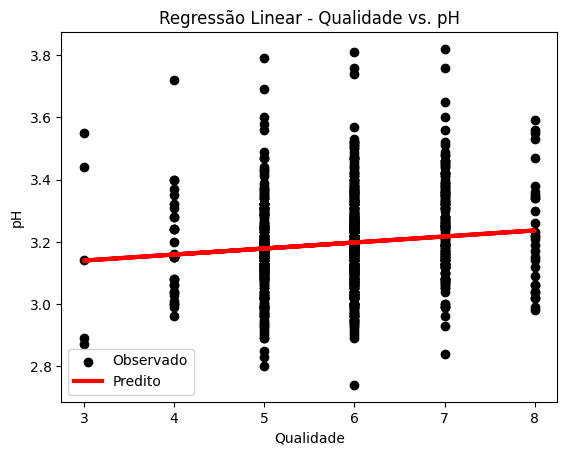

In [99]:
X = vinhos[['quality']]
y = vinhos['pH']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotando o modelo
plt.scatter(X_test, y_test, color='black', label='Observado')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Predito')
plt.xlabel('Qualidade')
plt.ylabel('pH')
plt.title('Regressão Linear - Qualidade vs. pH')
plt.legend()
plt.show()

o MSE é 0,023963145304782725 e o R2 é 0,022934484274698463. Isso significa que o modelo não é muito bom em prever a variável alvo. O MSE é relativamente alto, o que indica que há muita diferença entre os valores previstos e os valores reais. O R2 também é muito baixo, o que indica que o modelo está explicando apenas uma pequena quantidade da variância na variável alvo.





# Regressão logistíca

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/l

Acurácia do modelo: 0.9622

Matriz de Confusão:
[[763   0]
 [ 30   0]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       763
           1       0.00      0.00      0.00        30

    accuracy                           0.96       793
   macro avg       0.48      0.50      0.49       793
weighted avg       0.93      0.96      0.94       793



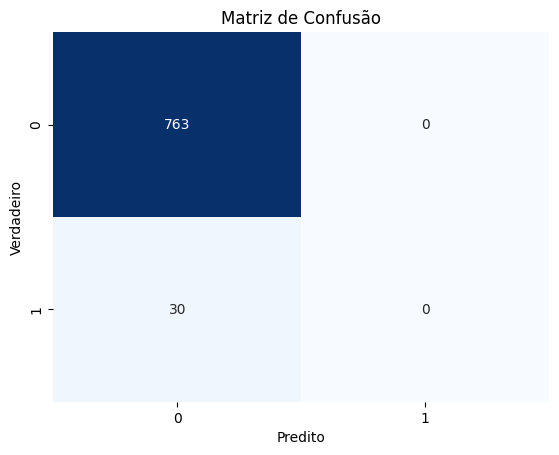

In [100]:
from sklearn.metrics import classification_report

vinhos['alta_qualidade'] = (vinhos['quality'] > 7).astype(int)

# variáveis independentes
X = vinhos[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# Variável resposta
y = vinhos['alta_qualidade']

# Dividindo  em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)

# realizando as  previsões no conjunto de teste
y_pred = modelo_logistico.predict(X_test)

# Avaliação do modelo
acuracia = accuracy_score(y_test, y_pred)
matriz_confusao = confusion_matrix(y_test, y_pred)
relatorio_classificacao = classification_report(y_test, y_pred)

# Exibindo os resultados
print(f'Acurácia do modelo: {acuracia:.4f}\n')
print('Matriz de Confusão:')
print(matriz_confusao)
print('\nRelatório de Classificação:')
print(relatorio_classificacao)

# Visualizando a matriz de confusão
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

A acurácia do modelo é alta (96%), mas isso pode ser enganoso devido ao desequilíbrio de classes. O modelo está prevendo predominantemente a classe majoritária (0 - baixa qualidade), resultando em uma precisão alta para essa classe.
No entanto, a sensibilidade (recall) para a classe 1 (alta qualidade) é zero, indicando que o modelo não conseguiu identificar corretamente nenhuma instância dessa classe. Isso pode ser devido ao desequilíbrio de classes, onde a classe 1 é rara em comparação com a classe 0.
O F1-score para a classe 1 é zero, indicando que o modelo tem dificuldade em equilibrar precisão e recall para a classe minoritária.
A precisão, recall e F1-score para a classe 0 são altos, mas isso é esperado devido ao desequilíbrio.
Em síntese,  o desempenho do modelo é bom para vinhos de alta qualidade. No entanto, o modelo é muito ruim para vinhos de baixa qualidade. Isso pode ser devido ao fato de que a classe minoritária é muito pequena e os dados podem não ser representativos da população real de vinhos.

# LOOP
Ao invés de construir os modelos individualmente, farei um loop , e avaliarei a precisão .

In [101]:
vinhos['alta_qualidade'] = (vinhos['quality'] > 7).astype(int)

# variáveis independentes
X = vinhos[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# Variável resposta
y = vinhos['alta_qualidade']

# Divisão em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos
models = [LogisticRegression(),
          LinearSVC(),
          SVC(kernel='rbf'),
          KNeighborsClassifier(),
          RandomForestClassifier(),
          DecisionTreeClassifier(),
          GradientBoostingClassifier(),
          GaussianNB()]

# Lista de nomes dos modelos
model_names = ['LogisticRegression', 'LinearSVM', 'rbfSVM', 'KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree', 'GradientBoostingClassifier', 'GaussianNB']

# Criando o pipeline para cada modelo
pipelines = []
for model, name in zip(models, model_names):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipelines.append((name, pipeline))

#  validação cruzada
for name, model in pipelines:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'Model: {name}')
    print(f'Cross-validated Accuracy: {scores.mean():.4f}\n')

Model: LogisticRegression
Cross-validated Accuracy: 0.9662



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model: LinearSVM
Cross-validated Accuracy: 0.9665

Model: rbfSVM
Cross-validated Accuracy: 0.9665

Model: KNearestNeighbors
Cross-validated Accuracy: 0.9662

Model: RandomForestClassifier
Cross-validated Accuracy: 0.9672

Model: DecisionTree
Cross-validated Accuracy: 0.9378

Model: GradientBoostingClassifier
Cross-validated Accuracy: 0.9640

Model: GaussianNB
Cross-validated Accuracy: 0.8586



para  avaliação  do desempenho dos modelos, foram utilizadas a  validação cruzada. A validação cruzada consiste em dividir os dados em vários conjuntos de treinamento e teste. O modelo é treinado em cada conjunto de treinamento e testado em seu conjunto de teste correspondente. A precisão média dos resultados do teste é usada para avaliar o desempenho do modelo.
Modelos que teve o melhor desempenho foi: LinearSVM , seguido por rbfSVM e o KNearestNeighbors.

---






---

Finalizarei esse projeto com um aprendizado interativo que consistirá em um joguinho interativo , o objetivo é que os usuários possam aprender mais sobre as diferentes características químicas dos vinhos e como elas afetam na qualidade e no sabor .

Muito obrigada por me acompanharem até aqui , Godere e inté mais 💓





In [102]:
import ipywidgets as widgets
from IPython.display import display, HTML

class JogoVinicola:
    def __init__(self):
        self.pontuacao = 0
        self.indice_pergunta_atual = 0

        # Perguntas e respostas
        self.perguntas = [
            "Qual é o componente fundamental que contribui para a textura e viscosidade do vinho?",
            "Por que um vinho doce terá um nível mais alto de açúcar residual?",
            "Qual fator está relacionado à deterioração no sabor de um vinho em relação à acidez?",
            "Quais são os principais compostos químicos presentes no vinho?",
            "Qual é a função da fermentação alcoólica na produção de vinho?",
            "Quais são os principais ácidos presentes no vinho?",
            "Quais são as principais substâncias responsáveis pela cor do vinho?",
            "Quais são as principais substâncias responsáveis pelo aroma e sabor do vinho?",
            "Como a composição química do vinho pode ser analisada?",
        ]

        self.respostas = [
            "Álcool",
            "O açúcar residual não foi totalmente convertido em álcool durante a fermentação.",
            "Acidez volátil",
            "água, álcool (etanol), glicerol, ácidos orgânicos, sais minerais e outras substâncias, como açúcares residuais, taninos, antocianinas e voláteis aromáticos.",
            "A fermentação alcoólica é uma reação química realizada por leveduras que transformam os açúcares presentes na uva em álcool etílico.",
            "tartárico, málico, cítrico, succínico, fosfórico e láctico. Os ácidos contribuem para o sabor e a acidez do vinho.",
            "antocianinas, flavonoides e carotenoides.",
            "voláteis aromáticos, taninos e açúcares residuais.",
            "Análise sensorial, Análise físico-química, Análise cromatográfica",
        ]

        #  interface
        self.label_pergunta = widgets.HTML(value=f"<h3>{self.perguntas[self.indice_pergunta_atual]}</h3>")
        self.entry_resposta = widgets.Text(placeholder="Digite sua resposta aqui", layout=widgets.Layout(width="50%"))
        self.btn_verificar = widgets.Button(description="Verificar Resposta", button_style="info", layout=widgets.Layout(width="50%"))

        # Adicionando a função para ação do botão
        self.btn_verificar.on_click(self.verificar_resposta)

        # Exibindo os elementos
        display(self.label_pergunta, self.entry_resposta, self.btn_verificar)

        self.output = widgets.Output()
        display(self.output)

        self.atualizar_interface()

    def verificar_resposta(self, b):
        resposta_usuario = self.entry_resposta.value.strip().lower()
        resposta_correta = self.respostas[self.indice_pergunta_atual].lower()

        with self.output:
            if resposta_usuario == resposta_correta:
                self.pontuacao += 1
                print("Parabéns! Sua resposta está correta.")
            else:
                print(f"A resposta correta é: {resposta_correta}")

        self.indice_pergunta_atual += 1
        self.atualizar_interface()

    def atualizar_interface(self):
        if self.indice_pergunta_atual < len(self.perguntas):
            self.label_pergunta.value = f"<h3>{self.perguntas[self.indice_pergunta_atual]}</h3>"
            self.entry_resposta.value = ""
        else:
            print(f"Fim do jogo! Sua pontuação final é {self.pontuacao}")

# Criando o joguinho
jogo = JogoVinicola()

HTML(value='<h3>Qual é o componente fundamental que contribui para a textura e viscosidade do vinho?</h3>')

Text(value='', layout=Layout(width='50%'), placeholder='Digite sua resposta aqui')

Button(button_style='info', description='Verificar Resposta', layout=Layout(width='50%'), style=ButtonStyle())

Output()

# Próximos passos

*   A inserção do Streamlit  para criar uma interface de usuário interativa .

*  Incorporar dados adicionais, desta vez focalizando informações específicas do Brasil, busca-se realizar uma análise comparativa enriquecida. Essa abordagem visa explorar as nuances do mercado de vinhos no contexto brasileiro, que tem demonstrado perspectivas promissoras de crescimento nos próximos anos. A inclusão de dados nacionais proporcionará uma visão mais abrangente, permitindo uma comparação mais contextualizada e informada

* A implementação do algoritmo Q-learning para prever a qualidade do vinho. O agente tem como meta aprender a realizar previsões precisas, mesmo diante da presença de uma classe minoritária bastante reduzida, como é o cenário atual.




---

# Referências



https://plotly.com/python/

https://github.com/ageron/handson-ml2

https://www.roteirodovinho.com.br/

https://crqsp.org.br/a-contribuicao-da-quimica-no-desenvolvimento-dos-vinhos/#:~:text=O%20vinho%20%C3%A9%20composto%2C%20em,respons%C3%A1veis%20pelos%20cheiros%20e%20sabores)

https://dspace.unipampa.edu.br/bitstream/riu/4770/2/NOVO%20PRODUTO.pdf


https://www2.ifrn.edu.br/ojs/index.php/HOLOS/article/download/611/471/2048



